## Kernel Test

Run this cell first to verify the kernel is working properly.

In [1]:
# Quick kernel test - This should run immediately
print("✅ Kernel is working!")
print("Python version check...")

import sys
print(f"Python {sys.version}")
print("\n🎯 Ready to proceed with Block 1")

✅ Kernel is working!
Python version check...
Python 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]

🎯 Ready to proceed with Block 1


# Model Selection Process - Interactive Workflow

This notebook provides independent, testable blocks to perform all tasks available in the frontend application.

## Overview of Available Blocks:

1. **Setup & Configuration** - Initialize API connections and imports
2. **Dataset Upload** - Upload CSV files to the backend
3. **Data Exploration** - View statistics, sample data, and visualizations
4. **Feature Importance** - Calculate and visualize feature importance
5. **SMOTE Analysis** - Apply synthetic minority oversampling
6. **Model Training** - Run multiple ML models with selected features
7. **Model Results** - Retrieve and analyze model performance
8. **SHAP Analysis** - Global model interpretability
9. **Statistical Tests** - Wilcoxon, McNemar, DeLong tests
10. **Label Randomization** - Validate model robustness
11. **Validated Explanations** - Generate evidence-based narratives
12. **Report Generation** - Create PDF reports

---

## Instructions:
- Run blocks sequentially or independently
- Each block is self-contained with error handling
- Test one block at a time before proceeding
- Modify parameters as needed for your dataset

## Block 1: Setup & Configuration

Import required libraries and configure API connection.

In [2]:
# Import required libraries
import requests
import pandas as pd
import numpy as np
import json
import os
from pathlib import Path
import time
from IPython.display import display, HTML, Image, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
from PIL import Image as PILImage
import warnings
warnings.filterwarnings('ignore')

print("✅ All imports successful!")

# Configure API Base URL
API_BASE_URL = "http://localhost:8000"

# Test API connection (with reduced timeout to avoid hanging)
print(f"\n🔍 Testing connection to {API_BASE_URL}...")
try:
    response = requests.get(f"{API_BASE_URL}/list_datasets", timeout=2)
    if response.status_code == 200:
        print("✅ API Connection Successful")
        print(f"📡 Connected to: {API_BASE_URL}")
    else:
        print(f"⚠️  API responded with status code: {response.status_code}")
except requests.exceptions.Timeout:
    print("⏱️  Connection timeout - Backend server may be slow or not responding")
    print("   You can continue anyway, but API calls will fail")
except requests.exceptions.ConnectionError:
    print("❌ Cannot connect to API. Please ensure the backend server is running.")
    print("   Start server with: python run_server.py")
    print("   Or check if port 8000 is already in use")
except Exception as e:
    print(f"❌ Error connecting to API: {str(e)}")

# Helper function for pretty printing JSON responses
def print_json(data, title="Response"):
    print(f"\n{'='*60}")
    print(f"  {title}")
    print('='*60)
    print(json.dumps(data, indent=2))
    print('='*60)

print("\n✅ Block 1 Complete: Setup & Configuration initialized")

✅ All imports successful!

🔍 Testing connection to http://localhost:8000...
✅ API Connection Successful
📡 Connected to: http://localhost:8000

✅ Block 1 Complete: Setup & Configuration initialized


## Block 2: Dataset Upload

Upload a CSV file to the backend. The CSV must contain a column named `target`.

In [3]:
# ===== CONFIGURE YOUR DATASET HERE =====
DATASET_PATH = "sample_datasets/credit_approval_dataset.csv"
# ========================================

# Upload dataset
try:
    # Check if file exists
    if not os.path.exists(DATASET_PATH):
        print(f"❌ File not found: {DATASET_PATH}")
        print("   Please update DATASET_PATH with the correct path")
    else:
        with open(DATASET_PATH, 'rb') as f:
            files = {'file': (os.path.basename(DATASET_PATH), f, 'text/csv')}
            response = requests.post(f"{API_BASE_URL}/upload_csv", files=files)
            print(files)
            
            if response.status_code == 200:
                data = response.json()
                print("✅ Dataset uploaded successfully!")
                print(f"\n📊 Dataset: {data.get('filename', 'Unknown')}")
                print(f"📝 Rows: {data.get('row_count', 'N/A')}")
                print(f"📋 Columns: {data.get('column_count', 'N/A')}")
                print(f"🎯 Target Column: {data.get('target_column', 'N/A')}")
                
                # Store filename for later use
                CURRENT_FILENAME = data.get('filename')
                print(f"\n💾 Stored filename: {CURRENT_FILENAME}")
                
                # Quick check: Display sample data to verify upload
                try:
                    check_response = requests.get(f"{API_BASE_URL}/get_data_details", params={"filename": CURRENT_FILENAME})
                    if check_response.status_code == 200:
                        check_data = check_response.json()
                        if 'sample_data' in check_data:
                            print("\n📊 QUICK DATA CHECK (First 5 rows):")
                            sample_data = check_data['sample_data']
                            df_sample = pd.DataFrame(sample_data['rows'], columns=sample_data['columns'])
                            display(df_sample)
                        else:
                            print("\n⚠️  Sample data not available yet")
                    else:
                        print(f"\n⚠️  Could not retrieve data details: {check_response.status_code}")
                except Exception as e:
                    print(f"\n⚠️  Could not check dataset: {str(e)}")
            else:
                print(f"❌ Upload failed with status {response.status_code}")
                print(f"   Error: {response.text}")
                
except Exception as e:
    print(f"❌ Error during upload: {str(e)}")

print("\n✅ Block 2 Complete: Dataset Upload")

{'file': ('credit_approval_dataset.csv', <_io.BufferedReader name='sample_datasets/credit_approval_dataset.csv'>, 'text/csv')}
✅ Dataset uploaded successfully!

📊 Dataset: credit_approval_dataset.csv
📝 Rows: N/A
📋 Columns: N/A
🎯 Target Column: N/A

💾 Stored filename: credit_approval_dataset.csv

📊 QUICK DATA CHECK (First 5 rows):


,a15,a14,a13,a12,a11,a10,a9,a8,a7,a6,a5,a4,a3,a2,a1,target
0,0,420.0,s,t,0,f,t,1.585,bb,e,g,u,7.5,32.33,b,0
1,0,NaN,g,t,0,f,t,12.500,bb,d,g,u,4.0,34.83,b,0
2,0,980.0,g,t,0,f,t,13.500,v,cc,g,u,5.0,38.58,a,0
3,0,400.0,s,f,0,f,t,10.750,v,m,g,u,0.5,44.25,b,0
4,2,160.0,g,f,0,f,f,1.625,v,c,p,y,7.0,44.83,b,0



✅ Block 2 Complete: Dataset Upload


## Block 3: Data Exploration

Retrieve and visualize dataset statistics, sample data, and quality metrics.

In [4]:
# Get dataset details
try:
    response = requests.get(f"{API_BASE_URL}/get_data_details", params={"filename": CURRENT_FILENAME})
    
    if response.status_code == 200:
        data = response.json()
        
        # Display sample data
        if 'sample_data' in data:
            print("📊 SAMPLE DATA (First 5 rows):")
            df_sample = pd.DataFrame(data['sample_data'])
            display(df_sample)
        
        # Display statistics
        if 'statistics' in data:
            print("\n📈 DESCRIPTIVE STATISTICS:")
            df_stats = pd.DataFrame(data['statistics'])
            display(df_stats)
        
        # Display column summary
        if 'column_summary' in data:
            print("\n📋 COLUMN SUMMARY:")
            df_cols = pd.DataFrame(data['column_summary'])
            display(df_cols)
        
        # Display target distribution
        if 'target_distribution' in data:
            print("\n🎯 TARGET DISTRIBUTION:")
            target_dist = data['target_distribution']
            df_target = pd.DataFrame(list(target_dist.items()), columns=['Class', 'Count'])
            display(df_target)
            
            # Plot target distribution
            plt.figure(figsize=(8, 5))
            plt.bar(df_target['Class'].astype(str), df_target['Count'], color=['#2ecc71', '#e74c3c'])
            plt.xlabel('Target Class')
            plt.ylabel('Count')
            plt.title('Target Distribution')
            plt.xticks(rotation=0)
            for i, v in enumerate(df_target['Count']):
                plt.text(i, v + max(df_target['Count'])*0.02, str(v), ha='center', va='bottom', fontweight='bold')
            plt.tight_layout()
            plt.show()
            
        # Display visualizations (if available)
        if 'pairplot_path' in data and data['pairplot_path']:
            print("\n📊 PAIRPLOT:")
            img_url = f"{API_BASE_URL}/images/{os.path.basename(data['pairplot_path'])}"
            display(HTML(f'<img src="{img_url}" style="max-width:100%; height:auto;">'))
        
        if 'heatmap_path' in data and data['heatmap_path']:
            print("\n🔥 CORRELATION HEATMAP:")
            img_url = f"{API_BASE_URL}/images/{os.path.basename(data['heatmap_path'])}"
            display(HTML(f'<img src="{img_url}" style="max-width:100%; height:auto;">'))
            
    else:
        print(f"❌ Failed to get data details: {response.status_code}")
        print(response.text)
        
except Exception as e:
    print(f"❌ Error: {str(e)}")

print("\n✅ Block 3 Complete: Data Exploration")

📊 SAMPLE DATA (First 5 rows):
❌ Error: All arrays must be of the same length

✅ Block 3 Complete: Data Exploration


## Block 4: Feature Importance Calculation

Calculate feature importance using Random Forest and Logistic Regression (L1).

In [5]:
# Calculate feature importance
try:
    payload = {"filename": CURRENT_FILENAME}
    response = requests.post(f"{API_BASE_URL}/feature-importance", json=payload)
    
    if response.status_code == 200:
        data = response.json()
        print("✅ Feature importance calculated successfully!")
        
        # Display Merged Feature Importance (Combined RF + LR)
        if 'merged_table' in data:
            print("\n🎯 MERGED FEATURE IMPORTANCE (RF + LR Combined):")
            df_merged = pd.DataFrame(data['merged_table'])
            # Select key columns for display
            display_cols = ['rank', 'base_feature', 'rf_score', 'lr_score', 'avg_score']
            df_merged_display = df_merged[display_cols].copy()
            df_merged_display = df_merged_display.sort_values('rank')
            display(df_merged_display)
        
        # Display Random Forest importance
        if 'rf_table' in data:
            print("\n🌲 RANDOM FOREST FEATURE IMPORTANCE:")
            df_rf = pd.DataFrame(data['rf_table'])
            df_rf = df_rf.sort_values('rf_score', ascending=False)
            display(df_rf.head(15))  # Show top 15 features
        
        # Display Logistic Regression importance
        if 'lr_table' in data:
            print("\n📊 LOGISTIC REGRESSION (L1) FEATURE IMPORTANCE:")
            df_lr = pd.DataFrame(data['lr_table'])
            df_lr = df_lr.sort_values('lr_score', ascending=False, key=lambda x: abs(x))
            display(df_lr.head(15))  # Show top 15 features
        
        # Display feature importance chart
        if 'chart_path' in data and data['chart_path']:
            print("\n📈 FEATURE IMPORTANCE VISUALIZATION:")
            img_url = f"{API_BASE_URL}{data['chart_path']}"
            display(HTML(f'<img src="{img_url}" style="max-width:100%; height:auto;">'))
        
        # CRITICAL FIX: Use BASE feature names (original columns) not encoded feature names
        # The backend expects original column names, not one-hot encoded names
        if 'merged_table' in data:
            # Use base features from merged table (original column names before encoding)
            ALL_FEATURES = [item['base_feature'] for item in data['merged_table']]
            print(f"\n💾 Stored {len(ALL_FEATURES)} base features for model training")
            print(f"   (These are original column names before encoding)")
        elif 'rf_table' in data:
            # Fallback: Use encoded feature names (may cause issues with SMOTE)
            ALL_FEATURES = [item['feature'] for item in data['rf_table']]
            print(f"\n⚠️  Using {len(ALL_FEATURES)} encoded features (fallback)")
            print(f"   Note: This may cause issues if using SMOTE")
        
        # Display metadata
        if 'metadata' in data:
            print(f"\n📋 METADATA:")
            print(f"   Total Features: {data['metadata'].get('total_features', 'N/A')}")
            
    else:
        print(f"❌ Failed to calculate feature importance: {response.status_code}")
        print(response.text)
        
except Exception as e:
    print(f"❌ Error: {str(e)}")

print("\n✅ Block 4 Complete: Feature Importance Calculation")


✅ Feature importance calculated successfully!

🎯 MERGED FEATURE IMPORTANCE (RF + LR Combined):


,rank,base_feature,rf_score,lr_score,avg_score
0,1,a9,0.241058,3.128270,1.000000
1,2,a10,0.066949,1.382714,0.351520
2,3,a8,0.102695,0.395097,0.268591
3,4,a11,0.092153,0.274953,0.227006
4,5,a15,0.088264,0.230993,0.211724
5,6,a3,0.079036,0.301705,0.203555
6,7,a13,0.007243,1.205391,0.196765
7,8,a2,0.076385,0.277967,0.194137
8,9,a14,0.061806,0.240221,0.157240
9,10,a4,0.009775,0.884423,0.150596



🌲 RANDOM FOREST FEATURE IMPORTANCE:


,feature,base_feature,rf_score
10,a9_t,a9,0.241058
3,a8,a8,0.102695
2,a11,a11,0.092153
0,a15,a15,0.088264
4,a3,a3,0.079036
5,a2,a2,0.076385
9,a10_t,a10,0.066949
1,a14,a14,0.061806
36,a1_b,a1,0.013824
8,a12_t,a12,0.012670



📊 LOGISTIC REGRESSION (L1) FEATURE IMPORTANCE:


,feature,base_feature,lr_score
10,a9_t,a9,3.128270
6,a13_p,a13,2.410782
15,a7_n,a7,1.853848
9,a10_t,a10,1.382714
23,a6_ff,a6,1.346637
31,a6_x,a6,1.164864
34,a4_u,a4,0.991359
33,a5_p,a5,0.950894
20,a6_cc,a6,0.827562
35,a4_y,a4,0.777487



📈 FEATURE IMPORTANCE VISUALIZATION:



💾 Stored 15 base features for model training
   (These are original column names before encoding)

📋 METADATA:
   Total Features: 37

✅ Block 4 Complete: Feature Importance Calculation


## Block 5: SMOTE Analysis (Optional)

Apply Synthetic Minority Over-sampling Technique to handle class imbalance.

In [6]:
# ===== CONFIGURE SMOTE =====
USE_SMOTE = True  # Set to False to skip SMOTE
# ===========================

if USE_SMOTE:
    try:
        # Check if ALL_FEATURES exists, if not try to get features from the API
        if 'ALL_FEATURES' not in dir():
            print("⚠️  ALL_FEATURES not found. Attempting to retrieve features from API...")
            feat_response = requests.post(f"{API_BASE_URL}/feature-importance", json={"filename": CURRENT_FILENAME})
            if feat_response.status_code == 200:
                feat_data = feat_response.json()
                # Use rf_table features (actual encoded column names)
                if 'rf_table' in feat_data:
                    ALL_FEATURES = [item['feature'] for item in feat_data['rf_table']]
                    print(f"✅ Retrieved {len(ALL_FEATURES)} encoded features from API")
                elif 'merged_table' in feat_data:
                    ALL_FEATURES = [item['base_feature'] for item in feat_data['merged_table']]
                    print(f"✅ Retrieved {len(ALL_FEATURES)} base features from API")
                else:
                    print("❌ Could not retrieve features. Please run Block 4 (Feature Importance) first.")
                    raise ValueError("ALL_FEATURES not available")
            else:
                print("❌ Failed to retrieve features. Please run Block 4 (Feature Importance) first.")
                raise ValueError("ALL_FEATURES not available")
        
        payload = {
            "filename": CURRENT_FILENAME,
            "selected_features": ALL_FEATURES,  # Fixed: use 'selected_features' not 'features'
            "apply_smote": True  # Fixed: add required 'apply_smote' field
        }
        
        print(f"\n📤 Sending SMOTE request with {len(ALL_FEATURES)} features...")
        response = requests.post(f"{API_BASE_URL}/apply-smote", json=payload)
        
        if response.status_code == 200:
            data = response.json()
            print("✅ SMOTE analysis completed successfully!")
            
            print("\n📊 BEFORE SMOTE:")
            print(f"   Class distribution: {data.get('before', {})}")
            
            print("\n📊 AFTER SMOTE:")
            print(f"   Class distribution: {data.get('after', {})}")
            
            print(f"\n🔄 Resampling Method: {data.get('method', 'N/A')}")
            print(f"📈 Total samples after SMOTE: {sum(data.get('after', {}).values())}")
        else:
            print(f"❌ SMOTE analysis failed: {response.status_code}")
            print(response.text)
            
    except Exception as e:
        print(f"❌ Error: {str(e)}")
else:
    print("⏭️  Skipping SMOTE (USE_SMOTE = False)")

print("\n✅ Block 5 Complete: SMOTE Analysis")


📤 Sending SMOTE request with 15 features...
✅ SMOTE analysis completed successfully!

📊 BEFORE SMOTE:
   Class distribution: {}

📊 AFTER SMOTE:
   Class distribution: {}

🔄 Resampling Method: N/A
📈 Total samples after SMOTE: 0

✅ Block 5 Complete: SMOTE Analysis


## Block 6: Model Training

Train multiple machine learning models with selected features.

🚀 Starting model training...
   Dataset: credit_approval_dataset.csv
   Model Groups: 3
   Total Models: 3
   Features: 15
   SMOTE: True

⏳ This may take 1-5 minutes depending on dataset size...

✅ Model training completed successfully!

💾 Run Timestamp: 2026-01-09T08:37:26.230756

📊 TRAINING RESULTS (3 models):


,Model,Group,AUC,Accuracy,F1,Recall,Time (s),Success
1,LR-Reg-SAGA,Regularized Logistic Regression,0.9579,0.8613,0.8614,0.8613,0.50,✓
2,RF-100-sqrt,Random Forest,0.9505,0.9017,0.9013,0.9017,0.60,✓
0,LR-LBFGS,Logistic Regression,0.9455,0.8382,0.8382,0.8382,0.70,✓



🏆 BENCHMARK MODEL (Best Overall):
   LR-Reg-SAGA (Regularized Logistic Regression)
   AUC: 0.9579


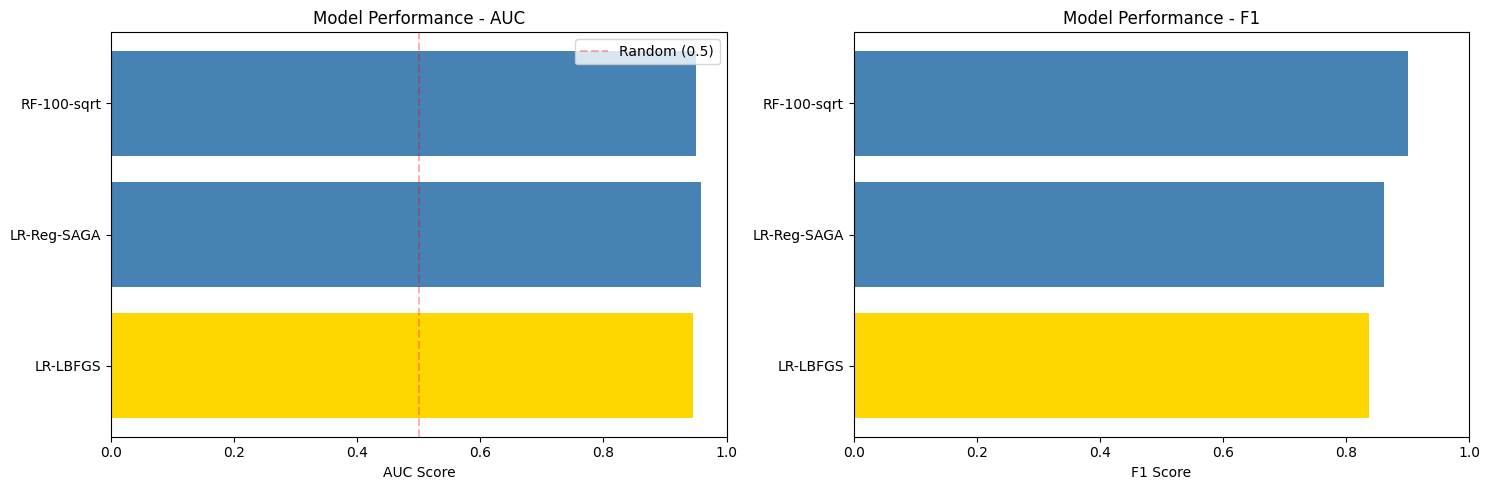


📋 Features Used: 15 base features
📋 After Encoding: 51 encoded features

✅ Block 6 Complete: Model Training


In [7]:
# ===== CONFIGURE MODEL TRAINING =====
# Select models to train (uncomment the ones you want to use)
# Format: Add variant codes to the appropriate group

SELECTED_MODEL_GROUPS = {
    # === Logistic Regression ===
    "Logistic Regression": [
        "LR-LBFGS",           # Logistic Regression (L2, LBFGS)
        # "LR-SAGA",          # Logistic Regression (L2, SAGA)
        # "LR-Newton",        # Logistic Regression (L2, Newton-CG)
    ],
    
    # === Regularized Logistic Regression ===
    "Regularized Logistic Regression": [
        "LR-Reg-SAGA",        # Regularized (ElasticNet, SAGA)
        # "LR-Reg-LBFGS",     # Regularized (L2, LBFGS)
        # "LR-Reg-Liblinear", # Regularized (L1, Liblinear)
    ],
    
    # === Random Forest ===
    "Random Forest": [
        "RF-100-sqrt",        # 100 trees, sqrt features
        # "RF-250-0.25",      # 250 trees, 25% features
        # "RF-500-0.5",       # 500 trees, 50% features
    ],
    
    # === AdaBoost (Decision Tree Stumps) ===
    # "AdaBoost (Decision Tree Stumps)": [
    #     "AdaBoost-10",      # 10 estimators
    #     "AdaBoost-20",      # 20 estimators
    #     "AdaBoost-30",      # 30 estimators
    # ],
    
    # === Bagging (CART) ===
    # "Bagging (CART)": [
    #     "BAG-CART-10",      # 10 estimators
    #     "BAG-CART-20",      # 20 estimators
    #     "BAG-CART-50",      # 50 estimators
    #     "BAG-CART-100",     # 100 estimators
    #     "BAG-CART-250",     # 250 estimators
    #     "BAG-CART-500",     # 500 estimators
    #     "BAG-CART-1000",    # 1000 estimators
    # ],
    
    # === Bagging (MLP) ===
    # "Bagging (MLP)": [
    #     "BAG-MLP-5",        # 5 estimators
    #     "BAG-MLP-10",       # 10 estimators
    #     "BAG-MLP-25",       # 25 estimators
    # ],
    
    # === Gradient Boosting ===
    # "Gradient Boosting": [
    #     "GB-10-0.1",        # 10 estimators, LR=0.1
    #     "GB-50-0.1",        # 50 estimators, LR=0.1
    #     "GB-100-0.1",       # 100 estimators, LR=0.1
    #     "GB-500-0.05",      # 500 estimators, LR=0.05
    #     "GB-1000-0.01",     # 1000 estimators, LR=0.01
    # ],
    
    # === K-Nearest Neighbors ===
    # "K-Nearest Neighbors": [
    #     "KNN-3",            # 3 neighbors
    #     "KNN-5",            # 5 neighbors
    #     "KNN-7",            # 7 neighbors
    #     "KNN-10",           # 10 neighbors
    # ],
    
    # === XGBoost (if installed) ===
    # "XGBoost": [
    #     "XGB-10-0.3",       # 10 estimators, LR=0.3
    #     "XGB-50-0.3",       # 50 estimators, LR=0.3
    #     "XGB-100-0.3",      # 100 estimators, LR=0.3
    #     "XGB-500-0.1",      # 500 estimators, LR=0.1
    # ],
    
    # === LightGBM (if installed) ===
    # "LightGBM": [
    #     "LGBM-10-0.3",      # 10 estimators, LR=0.3
    #     "LGBM-50-0.3",      # 50 estimators, LR=0.3
    #     "LGBM-100-0.3",     # 100 estimators, LR=0.3
    #     "LGBM-500-0.1",     # 500 estimators, LR=0.1
    # ],
    
    # === PyTorch Neural Networks (if installed) ===
    # "PyTorch Neural Networks": [
    #     "Torch-MLP-64-32",       # MLP with 64,32 hidden dims
    #     "Torch-TCN-64",          # Temporal Convolutional Network
    #     "Torch-Transformer-64",  # Transformer Encoder
    # ],
}

# Select features - USE ALL FEATURES (recommended for SMOTE compatibility)
# The backend will handle feature encoding automatically
SELECTED_FEATURES = ALL_FEATURES  # Use all features from Block 4
# Alternative: Use top N features: SELECTED_FEATURES = ALL_FEATURES[:15]
# ====================================

try:
    # Count total models selected
    total_models = sum(len(variants) for variants in SELECTED_MODEL_GROUPS.values() if variants)
    
    payload = {
        "filename": CURRENT_FILENAME,
        "selected_model_groups": SELECTED_MODEL_GROUPS,  # Use new format
        "selected_features": SELECTED_FEATURES,
        "use_smote": USE_SMOTE
    }
    
    print(f"🚀 Starting model training...")
    print(f"   Dataset: {CURRENT_FILENAME}")
    print(f"   Model Groups: {len(SELECTED_MODEL_GROUPS)}")
    print(f"   Total Models: {total_models}")
    print(f"   Features: {len(SELECTED_FEATURES)}")
    print(f"   SMOTE: {USE_SMOTE}")
    print(f"\n⏳ This may take 1-5 minutes depending on dataset size...\n")
    
    response = requests.post(f"{API_BASE_URL}/run-models", json=payload, timeout=600)
    
    if response.status_code == 200:
        data = response.json()
        print("✅ Model training completed successfully!")
        
        # Store the complete response for later blocks
        MODEL_TRAINING_RESULTS = data
        
        # Check for run_id (may not be present in current backend version)
        if 'run_id' in data:
            CURRENT_RUN_ID = data['run_id']
            print(f"\n💾 Model Run ID: {CURRENT_RUN_ID}")
        else:
            # Generate a pseudo run_id from timestamp for reference
            CURRENT_RUN_ID = data.get('timestamp', str(time.time()))
            print(f"\n💾 Run Timestamp: {CURRENT_RUN_ID}")
        
        # Parse results from 'all_models' array (new format with full details)
        if 'all_models' in data and data['all_models']:
            print(f"\n📊 TRAINING RESULTS ({len(data['all_models'])} models):")
            
            # Create results dataframe from all_models
            results_list = []
            for model in data['all_models']:
                metrics = model.get('metrics', {})
                results_list.append({
                    'Model': model.get('model_name', 'N/A'),
                    'Group': model.get('model_group', 'N/A'),
                    'AUC': f"{metrics.get('AUC', 0):.4f}",
                    'Accuracy': f"{metrics.get('PCC', 0):.4f}",
                    'F1': f"{metrics.get('F1', 0):.4f}",
                    'Recall': f"{metrics.get('Recall', 0):.4f}",
                    'Time (s)': f"{model.get('execution_time', 0):.2f}",
                    'Success': '✓' if model.get('execution_success', False) else '✗'
                })
            
            df_results = pd.DataFrame(results_list)
            df_results = df_results.sort_values('AUC', ascending=False)
            display(df_results)
            
            # Show benchmark model
            if 'benchmark_model' in data:
                benchmark = data['benchmark_model']
                print(f"\n🏆 BENCHMARK MODEL (Best Overall):")
                print(f"   {benchmark.get('model_name', 'N/A')} ({benchmark.get('model_group', 'N/A')})")
                print(f"   AUC: {benchmark.get('metrics', {}).get('AUC', 0):.4f}")
            
            # Plot performance comparison
            fig, axes = plt.subplots(1, 2, figsize=(15, 5))
            
            # AUC comparison
            ax1 = axes[0]
            models = [r['Model'] for r in results_list]
            aucs = [float(r['AUC']) for r in results_list]
            colors = ['gold' if i == 0 else 'steelblue' for i in range(len(models))]
            ax1.barh(models, aucs, color=colors)
            ax1.set_xlabel('AUC Score')
            ax1.set_title('Model Performance - AUC')
            ax1.set_xlim([0, 1])
            ax1.axvline(x=0.5, color='red', linestyle='--', alpha=0.3, label='Random (0.5)')
            ax1.legend()
            
            # F1 Score comparison
            ax2 = axes[1]
            f1s = [float(r['F1']) for r in results_list]
            ax2.barh(models, f1s, color=colors)
            ax2.set_xlabel('F1 Score')
            ax2.set_title('Model Performance - F1')
            ax2.set_xlim([0, 1])
            
            plt.tight_layout()
            plt.show()
            
            # Show feature usage info
            if 'features_used' in data:
                print(f"\n📋 Features Used: {len(data['features_used'])} base features")
            if 'selected_features_transformed' in data:
                print(f"📋 After Encoding: {len(data['selected_features_transformed'])} encoded features")
            
        else:
            print("\n⚠️  WARNING: No model results in response!")
            
    else:
        print(f"❌ Model training failed: {response.status_code}")
        print(response.text)
        
except requests.exceptions.Timeout:
    print("❌ Request timed out. Model training is taking longer than expected.")
    print("   You can check the status later using Block 7: Model Results")
except Exception as e:
    print(f"❌ Error: {str(e)}")

print("\n✅ Block 6 Complete: Model Training")


## Block 7: Model Results & Analysis

Retrieve and analyze model results, including confusion matrices and ROC curves.

📦 Using stored results from Block 6 (Model Training)

✅ Retrieved 3 model results

MODEL 1: LR-LBFGS
Group: Logistic Regression

📊 PERFORMANCE METRICS:
   AUC:       0.9455
   Accuracy:  0.8382
   F1 Score:  0.8382
   Recall:    0.8382
   Brier Score: 0.1104
   KS Statistic: 0.7865

⚙️  EXECUTION INFO:
   Time: 0.70s
   Success: ✓

🏆 Best model in its group!


MODEL 2: LR-Reg-SAGA
Group: Regularized Logistic Regression

📊 PERFORMANCE METRICS:
   AUC:       0.9579
   Accuracy:  0.8613
   F1 Score:  0.8614
   Recall:    0.8613
   Brier Score: 0.0833
   KS Statistic: 0.8333

⚙️  EXECUTION INFO:
   Time: 0.50s
   Success: ✓

🏆 Best model in its group!


MODEL 3: RF-100-sqrt
Group: Random Forest

📊 PERFORMANCE METRICS:
   AUC:       0.9505
   Accuracy:  0.9017
   F1 Score:  0.9013
   Recall:    0.9017
   Brier Score: 0.0851
   KS Statistic: 0.8206

⚙️  EXECUTION INFO:
   Time: 0.60s
   Success: ✓

🏆 Best model in its group!


🏆 BENCHMARK MODEL (Best Overall)
Model: LR-Reg-SAGA
Group: Regula

,Model,Group,AUC,Accuracy,F1,Recall,Best in Group
1,LR-Reg-SAGA,Regularized Logistic Regression,0.9579,0.8613,0.8614,0.8613,🏆
2,RF-100-sqrt,Random Forest,0.9505,0.9017,0.9013,0.9017,🏆
0,LR-LBFGS,Logistic Regression,0.9455,0.8382,0.8382,0.8382,🏆



📊 Performance Comparison Charts:


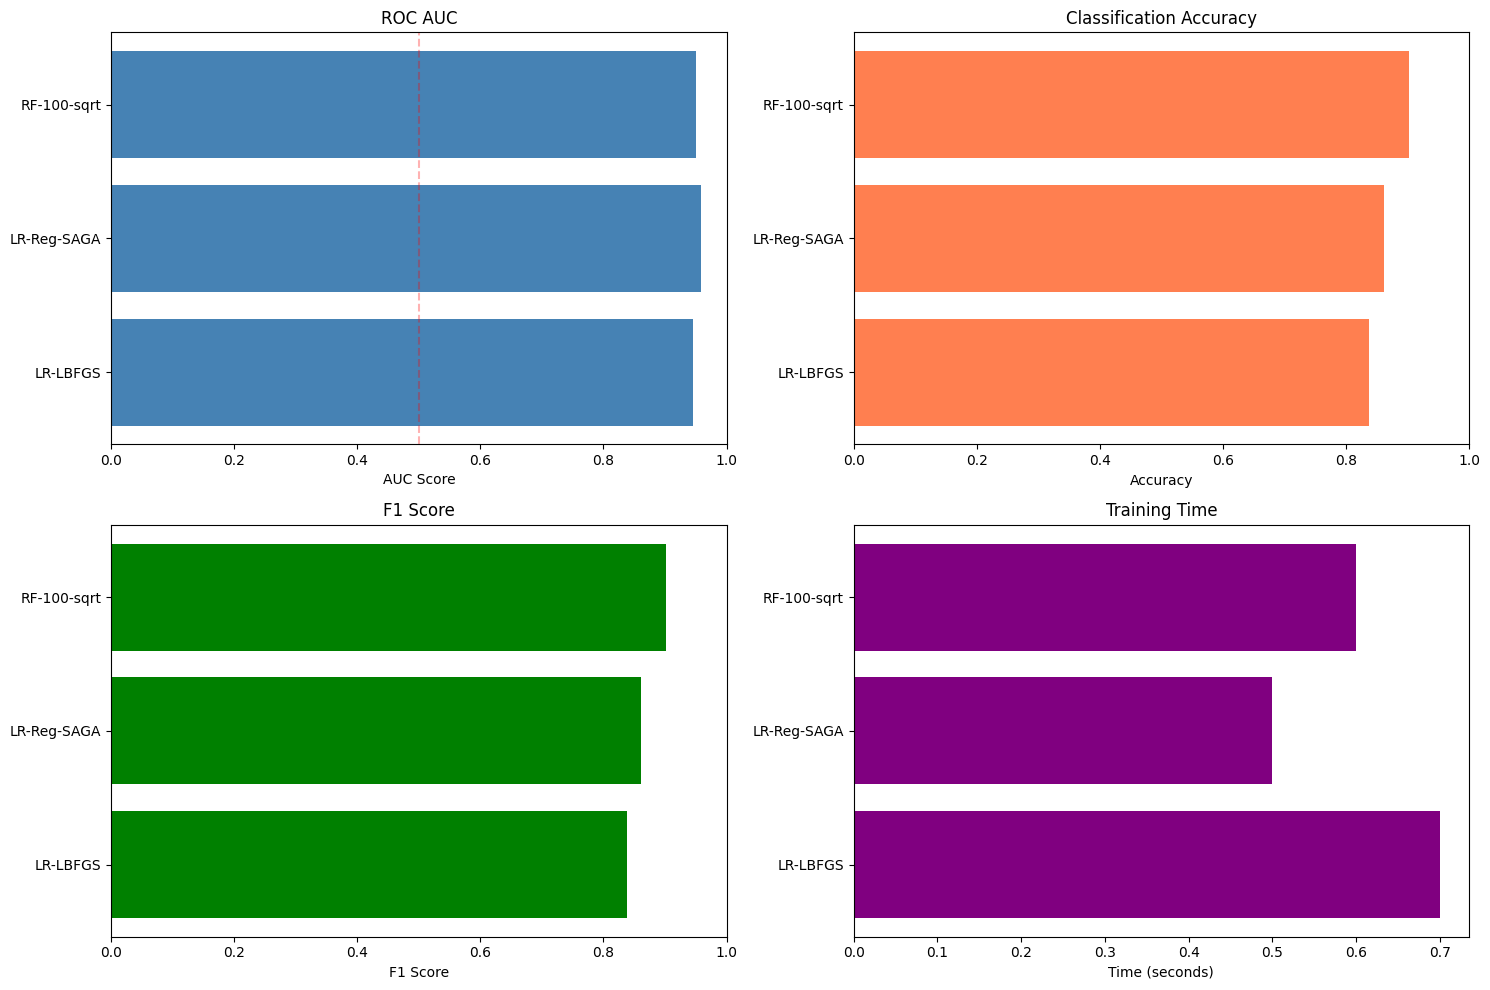


✅ Block 7 Complete: Model Results & Analysis


In [8]:
# Retrieve model results
try:
    # Try to use results from Block 6 first (stored in memory)
    if 'MODEL_TRAINING_RESULTS' in dir() and MODEL_TRAINING_RESULTS:
        print("📦 Using stored results from Block 6 (Model Training)\n")
        data = MODEL_TRAINING_RESULTS
        
        # Use 'all_models' array for detailed results
        if 'all_models' in data and data['all_models']:
            print(f"✅ Retrieved {len(data['all_models'])} model results\n")
            
            # Display detailed results for each model
            for i, model in enumerate(data['all_models'], 1):
                print(f"{'='*70}")
                print(f"MODEL {i}: {model.get('model_name', 'Unknown')}")
                print(f"Group: {model.get('model_group', 'N/A')}")
                print('='*70)
                
                # Metrics
                metrics = model.get('metrics', {})
                print(f"\n📊 PERFORMANCE METRICS:")
                print(f"   AUC:       {metrics.get('AUC', 0):.4f}")
                print(f"   Accuracy:  {metrics.get('PCC', 0):.4f}")
                print(f"   F1 Score:  {metrics.get('F1', 0):.4f}")
                print(f"   Recall:    {metrics.get('Recall', 0):.4f}")
                print(f"   Brier Score: {metrics.get('BS', 0):.4f}")
                print(f"   KS Statistic: {metrics.get('KS', 0):.4f}")
                
                # Execution info
                print(f"\n⚙️  EXECUTION INFO:")
                print(f"   Time: {model.get('execution_time', 0):.2f}s")
                print(f"   Success: {'✓' if model.get('execution_success', False) else '✗'}")
                if model.get('error_message'):
                    print(f"   Error: {model.get('error_message')}")
                
                # Is best in group?
                if model.get('is_best_in_group'):
                    print(f"\n🏆 Best model in its group!")
                
                print("\n")
            
            # Show benchmark model
            if 'benchmark_model' in data:
                benchmark = data['benchmark_model']
                print(f"{'='*70}")
                print(f"🏆 BENCHMARK MODEL (Best Overall)")
                print('='*70)
                print(f"Model: {benchmark.get('model_name', 'N/A')}")
                print(f"Group: {benchmark.get('model_group', 'N/A')}")
                metrics = benchmark.get('metrics', {})
                print(f"\nPerformance:")
                print(f"   AUC:      {metrics.get('AUC', 0):.4f}")
                print(f"   Accuracy: {metrics.get('PCC', 0):.4f}")
                print(f"   F1 Score: {metrics.get('F1', 0):.4f}")
                
            # Create comparison table
            print(f"\n{'='*70}")
            print("📊 MODEL COMPARISON TABLE")
            print('='*70)
            
            results_list = []
            for model in data['all_models']:
                metrics = model.get('metrics', {})
                results_list.append({
                    'Model': model.get('model_name', 'N/A'),
                    'Group': model.get('model_group', 'N/A'),
                    'AUC': metrics.get('AUC', 0),
                    'Accuracy': metrics.get('PCC', 0),
                    'F1': metrics.get('F1', 0),
                    'Recall': metrics.get('Recall', 0),
                    'Best in Group': '🏆' if model.get('is_best_in_group') else ''
                })
            
            df_comparison = pd.DataFrame(results_list)
            df_comparison = df_comparison.sort_values('AUC', ascending=False)
            
            # Format numeric columns
            for col in ['AUC', 'Accuracy', 'F1', 'Recall']:
                df_comparison[col] = df_comparison[col].apply(lambda x: f"{x:.4f}")
            
            display(df_comparison)
            
            # Visualize comparison
            print(f"\n📊 Performance Comparison Charts:")
            
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            
            model_names = [m.get('model_name', 'N/A') for m in data['all_models']]
            
            # AUC
            aucs = [m.get('metrics', {}).get('AUC', 0) for m in data['all_models']]
            axes[0, 0].barh(model_names, aucs, color='steelblue')
            axes[0, 0].set_xlabel('AUC Score')
            axes[0, 0].set_title('ROC AUC')
            axes[0, 0].set_xlim([0, 1])
            axes[0, 0].axvline(x=0.5, color='red', linestyle='--', alpha=0.3)
            
            # Accuracy
            accs = [m.get('metrics', {}).get('PCC', 0) for m in data['all_models']]
            axes[0, 1].barh(model_names, accs, color='coral')
            axes[0, 1].set_xlabel('Accuracy')
            axes[0, 1].set_title('Classification Accuracy')
            axes[0, 1].set_xlim([0, 1])
            
            # F1 Score
            f1s = [m.get('metrics', {}).get('F1', 0) for m in data['all_models']]
            axes[1, 0].barh(model_names, f1s, color='green')
            axes[1, 0].set_xlabel('F1 Score')
            axes[1, 0].set_title('F1 Score')
            axes[1, 0].set_xlim([0, 1])
            
            # Execution Time
            times = [m.get('execution_time', 0) for m in data['all_models']]
            axes[1, 1].barh(model_names, times, color='purple')
            axes[1, 1].set_xlabel('Time (seconds)')
            axes[1, 1].set_title('Training Time')
            
            plt.tight_layout()
            plt.show()
            
        else:
            print("⚠️  No model results found in stored data")
    
    else:
        # Fallback: Try to query API (may not work if backend doesn't persist results)
        print("⚠️  No stored results found. Attempting to query API...\n")
        
        params = {
            "filename": CURRENT_FILENAME,
            "run_id": CURRENT_RUN_ID if 'CURRENT_RUN_ID' in dir() else None
        }
        response = requests.get(f"{API_BASE_URL}/model-results", params=params)
        
        if response.status_code == 200:
            data = response.json()
            
            if 'results' in data and data['results']:
                print(f"✅ Retrieved {len(data['results'])} model results from API")
                
                # Display results (basic format)
                for i, result in enumerate(data['results'], 1):
                    print(f"\n{'='*70}")
                    print(f"MODEL {i}: {result.get('model_name', 'Unknown')}")
                    print('='*70)
                    
                    metrics = result.get('metrics', {})
                    print(f"\n📊 PERFORMANCE METRICS:")
                    print(f"   Accuracy:  {metrics.get('accuracy', 0):.4f}")
                    print(f"   Precision: {metrics.get('precision', 0):.4f}")
                    print(f"   Recall:    {metrics.get('recall', 0):.4f}")
                    print(f"   F1 Score:  {metrics.get('f1', 0):.4f}")
                    print(f"   ROC AUC:   {metrics.get('roc_auc', 0):.4f}")
            else:
                print("⚠️  No model results found in API response")
                print("\n💡 TIP: Make sure you ran Block 6 (Model Training) first!")
                print("   Block 7 displays results from the most recent training run.")
        else:
            print(f"❌ Failed to retrieve results from API: {response.status_code}")
            print(response.text)
            print("\n💡 TIP: Run Block 6 (Model Training) first to generate results!")
        
except Exception as e:
    print(f"❌ Error: {str(e)}")
    print("\n💡 TIP: Make sure you ran Block 6 (Model Training) successfully before running this block.")

print("\n✅ Block 7 Complete: Model Results & Analysis")


## Block 8: SHAP Analysis

Run global SHAP analysis for model interpretability.

In [9]:
# ===== CONFIGURE SHAP ANALYSIS =====
RUN_SHAP = True
SHAP_CONFIG = {
    "n_trials": 3,           # Number of stability trials (2-20)
    "bg_size": 20,          # Background dataset size (10-100)
    "selected_models": []    # Empty list = analyze best model only
    # To analyze specific models, use exact model names from Block 6:
    # ["LR-LBFGS", "LR-Reg-SAGA", "RF-100-sqrt"]
}
# ===================================

if RUN_SHAP:
    try:
        # Check if required variables exist
        if 'ALL_FEATURES' not in dir():
            print("⚠️  ALL_FEATURES not found. Please run Block 4 (Feature Importance) first.")
            raise ValueError("ALL_FEATURES required for SHAP analysis")
        
        # Show available models from last training run
        if 'MODEL_TRAINING_RESULTS' in dir() and 'all_models' in MODEL_TRAINING_RESULTS:
            print("📋 Available models from last training run:")
            for m in MODEL_TRAINING_RESULTS['all_models']:
                print(f"   • {m.get('model_name', 'N/A')}")
            print()
        
        payload = {
            "filename": CURRENT_FILENAME,
            "run_id": CURRENT_RUN_ID if 'CURRENT_RUN_ID' in dir() else None,
            "selected_features": ALL_FEATURES,  # Required: features to use for SHAP
            **SHAP_CONFIG
        }
        
        print("🔍 Starting SHAP analysis...")
        print(f"   Trials: {SHAP_CONFIG['n_trials']}")
        print(f"   Background Size: {SHAP_CONFIG['bg_size']}")
        if SHAP_CONFIG['selected_models']:
            print(f"   Models: {SHAP_CONFIG['selected_models']}")
        else:
            print(f"   Models: Best model only (highest AUC)")
        print(f"   Features: {len(ALL_FEATURES)}")
        print(f"\n⏳ This may take 5-15 minutes...\n")
        
        response = requests.post(f"{API_BASE_URL}/shap-analysis", json=payload, timeout=900)
        
        if response.status_code == 200:
            data = response.json()
            print("✅ SHAP analysis completed!")
            
            # Display results for each model
            if 'results' in data and data['results']:
                for model_result in data['results']:
                    model_name = model_result.get('model_name', 'Unknown')
                    print(f"\n{'='*70}")
                    print(f"📊 SHAP ANALYSIS: {model_name}")
                    print('='*70)
                    
                    # Stability metrics
                    if 'stability_metrics' in model_result:
                        stability = model_result['stability_metrics']
                        print(f"\n📈 STABILITY METRICS:")
                        print(f"   Average Stability: {stability.get('average_stability', 0):.4f}")
                        print(f"   Rank Stability: {stability.get('rank_stability', 0):.4f}")
                    
                    # Feature importance
                    if 'feature_importance' in model_result:
                        print(f"\n🎯 TOP FEATURE IMPORTANCE:")
                        df_shap = pd.DataFrame(model_result['feature_importance'][:10])
                        display(df_shap)
                    
                    # Visualizations
                    if 'summary_plot_path' in model_result and model_result['summary_plot_path']:
                        print(f"\n📊 SHAP Summary Plot:")
                        img_url = f"{API_BASE_URL}/images/{os.path.basename(model_result['summary_plot_path'])}"
                        display(HTML(f'<img src="{img_url}" style="max-width:100%; height:auto;">'))
                    
                    if 'bar_plot_path' in model_result and model_result['bar_plot_path']:
                        print(f"\n📊 SHAP Bar Plot:")
                        img_url = f"{API_BASE_URL}/images/{os.path.basename(model_result['bar_plot_path'])}"
                        display(HTML(f'<img src="{img_url}" style="max-width:100%; height:auto;">'))
                    
                    if 'stability_plot_path' in model_result and model_result['stability_plot_path']:
                        print(f"\n📈 Stability Plot:")
                        img_url = f"{API_BASE_URL}/images/{os.path.basename(model_result['stability_plot_path'])}"
                        display(HTML(f'<img src="{img_url}" style="max-width:100%; height:auto;">'))
            else:
                print("\n⚠️  No SHAP results in response")
                print("\n💡 BACKEND LIMITATION:")
                print("   The current backend doesn't persist trained models with a run_id,")
                print("   so SHAP analysis can't retrieve them from disk.")
                print("\n   WORKAROUND OPTIONS:")
                print("   1. Use the frontend web application for SHAP analysis")
                print("   2. Backend needs to be updated to save models with proper run_id")
                print("   3. SHAP endpoint needs to accept model objects directly")
                    
        else:
            print(f"❌ SHAP analysis failed: {response.status_code}")
            print(response.text)
            
    except requests.exceptions.Timeout:
        print("❌ Request timed out. SHAP analysis is taking longer than expected.")
    except ValueError as e:
        print(f"❌ {str(e)}")
    except Exception as e:
        print(f"❌ Error: {str(e)}")
else:
    print("⏭️  Skipping SHAP analysis (RUN_SHAP = False)")

print("\n✅ Block 8 Complete: SHAP Analysis")


📋 Available models from last training run:
   • LR-LBFGS
   • LR-Reg-SAGA
   • RF-100-sqrt

🔍 Starting SHAP analysis...
   Trials: 3
   Background Size: 20
   Models: Best model only (highest AUC)
   Features: 15

⏳ This may take 5-15 minutes...

✅ SHAP analysis completed!

⚠️  No SHAP results in response

💡 BACKEND LIMITATION:
   The current backend doesn't persist trained models with a run_id,
   so SHAP analysis can't retrieve them from disk.

   WORKAROUND OPTIONS:
   1. Use the frontend web application for SHAP analysis
   2. Backend needs to be updated to save models with proper run_id
   3. SHAP endpoint needs to accept model objects directly

✅ Block 8 Complete: SHAP Analysis


## Block 9: Statistical Significance Tests

Run statistical tests (Wilcoxon, McNemar, DeLong) to compare model performance.

In [14]:
# ===== CONFIGURE STATISTICAL TESTS =====
RUN_STATISTICAL_TESTS = True
STAT_TEST_CONFIG = {
    "test_types": ["wilcoxon", "mcnemar", "delong"],  # Available: wilcoxon, mcnemar, delong
    "comparison_strategy": "benchmark_vs_group_bests"  # Options: best_per_group, benchmark_vs_group_bests, benchmark_vs_all, all_pairs
}
# ========================================

if RUN_STATISTICAL_TESTS:
    try:
        # Get model names from training results
        if 'MODEL_TRAINING_RESULTS' in dir() and MODEL_TRAINING_RESULTS.get('all_models'):
            model_names = [m['model_name'] for m in MODEL_TRAINING_RESULTS['all_models']]
            # For simplicity, compare first two models (can be expanded)
            model_pairs = [{"model_1_name": model_names[0], "model_2_name": model_names[1]}] if len(model_names) >= 2 else []
        else:
            model_pairs = []
        
        payload = {
            "filename": CURRENT_FILENAME,
            "run_timestamp": CURRENT_RUN_ID if 'CURRENT_RUN_ID' in dir() else None,
            "model_pairs": model_pairs,
            "selected_features": SELECTED_FEATURES,
            **STAT_TEST_CONFIG
        }
        
        print("📊 Starting statistical significance tests...")
        print(f"   Tests: {', '.join(STAT_TEST_CONFIG['test_types'])}")
        print(f"   Strategy: {STAT_TEST_CONFIG['comparison_strategy']}")
        print(f"   Model Pairs: {model_pairs}")
        print(f"\n⏳ This may take 2-5 minutes...\n")
        
        response = requests.post(f"{API_BASE_URL}/statistical-tests", json=payload, timeout=600)
        
        if response.status_code == 200:
            data = response.json()
            print("✅ Statistical tests completed!")
            
            # Summary
            if 'summary' in data:
                summary = data['summary']
                print(f"\n📋 SUMMARY:")
                print(f"   Total Comparisons: {summary.get('total_comparisons', 0)}")
                print(f"   Significant Results: {summary.get('significant_results', 0)}")
                print(f"   Tests Performed: {', '.join(summary.get('tests_performed', []))}")
            
            # Test results
            if 'results' in data:
                # results is a list of test results
                results_list = []
                for result in data['results']:
                    results_list.append({
                        'Model Pair': result.get('model_pair', 'N/A'),
                        'Test': result.get('test', 'N/A'),
                        'Statistic': f"{result.get('result', {}).get('statistic', 0):.4f}",
                        'P-Value': f"{result.get('result', {}).get('p_value', 0):.4f}",
                        'Significant': '✓' if result.get('result', {}).get('significant', False) else '✗',
                        'Interpretation': result.get('result', {}).get('interpretation', 'N/A')
                    })
                
                if results_list:
                    df_test = pd.DataFrame(results_list)
                    display(df_test)
            
            # Visualization
            if 'visualization_path' in data and data['visualization_path']:
                print(f"\n📊 Statistical Tests Visualization:")
                img_url = f"{API_BASE_URL}/images/{os.path.basename(data['visualization_path'])}"
                display(HTML(f'<img src="{img_url}" style="max-width:100%; height:auto;">'))
                
        else:
            print(f"❌ Statistical tests failed: {response.status_code}")
            print(response.text)
            
    except requests.exceptions.Timeout:
        print("❌ Request timed out. Tests are taking longer than expected.")
    except Exception as e:
        print(f"❌ Error: {str(e)}")
else:
    print("⏭️  Skipping statistical tests (RUN_STATISTICAL_TESTS = False)")

print("\n✅ Block 9 Complete: Statistical Significance Tests")

📊 Starting statistical significance tests...
   Tests: wilcoxon, mcnemar, delong
   Strategy: benchmark_vs_group_bests
   Model Pairs: [{'model_1_name': 'LR-LBFGS', 'model_2_name': 'LR-Reg-SAGA'}]

⏳ This may take 2-5 minutes...

✅ Statistical tests completed!


,Model Pair,Test,Statistic,P-Value,Significant,Interpretation
0,LR-LBFGS vs LR-Reg-SAGA,wilcoxon,1.0000,0.1250,✗,No significant difference in AUC between model...
1,LR-LBFGS vs LR-Reg-SAGA,mcnemar,0.0976,0.7548,✗,No significant difference in classification ac...
2,LR-LBFGS vs LR-Reg-SAGA,delong,0.3330,0.7391,✗,No significant difference in AUC between model...



✅ Block 9 Complete: Statistical Significance Tests


## Block 10: Label Randomization Test

Test model robustness by training with randomized labels to verify patterns aren't due to overfitting.

In [15]:
# ===== CONFIGURE LABEL RANDOMIZATION =====
RUN_LABEL_RANDOMIZATION = True
LABEL_RAND_CONFIG = {
    "n_iterations": 5,      # Number of randomization iterations (default: 10)
    "random_seed": 42       # Random seed for reproducibility
}
# =========================================

if RUN_LABEL_RANDOMIZATION:
    try:
        # Check if required variables exist
        if 'ALL_FEATURES' not in dir():
            print("⚠️  ALL_FEATURES not found. Please run Block 4 (Feature Importance) first.")
            raise ValueError("ALL_FEATURES required for label randomization test")
        
        payload = {
            "filename": CURRENT_FILENAME,
            "run_id": CURRENT_RUN_ID if 'CURRENT_RUN_ID' in dir() else None,
            "selected_features": ALL_FEATURES,  # Required: features to use for retraining
            **LABEL_RAND_CONFIG
        }
        
        print("🎲 Starting label randomization test...")
        print(f"   Iterations: {LABEL_RAND_CONFIG['n_iterations']}")
        print(f"   Seed: {LABEL_RAND_CONFIG['random_seed']}")
        print(f"   Features: {len(ALL_FEATURES)}")
        print(f"\n⚠️  WARNING: This reruns all models with shuffled labels")
        print(f"⏳ This may take 5-10 minutes...\n")
        
        response = requests.post(f"{API_BASE_URL}/label-randomization", json=payload, timeout=900)
        
        if response.status_code == 200:
            data = response.json()
            print("✅ Label randomization test completed!")
            
            # Summary
            if 'summary' in data:
                summary = data['summary']
                print(f"\n📋 SUMMARY:")
                print(f"   Models Tested: {summary.get('n_models', 0)}")
                print(f"   Iterations: {summary.get('n_iterations', 0)}")
                print(f"   Passed Tests: {summary.get('passed', 0)}")
                print(f"   Failed Tests: {summary.get('failed', 0)}")
            
            # Results per model
            if 'results' in data:
                print(f"\n📊 RESULTS BY MODEL:")
                results_list = []
                for result in data['results']:
                    results_list.append({
                        'Model': result.get('model_name', 'N/A'),
                        'Original AUC': f"{result.get('original_auc', 0):.4f}",
                        'Mean Random AUC': f"{result.get('mean_random_auc', 0):.4f}",
                        'AUC Drop': f"{result.get('auc_drop', 0):.4f}",
                        'P-Value': f"{result.get('p_value', 0):.4f}",
                        'Passed': '✓' if result.get('passed', False) else '✗'
                    })
                
                df_label_rand = pd.DataFrame(results_list)
                display(df_label_rand)
                
                # Interpretation
                print(f"\n💡 INTERPRETATION:")
                print(f"   ✓ Passed: Model performance drops significantly with random labels (good)")
                print(f"   ✗ Failed: Model maintains high performance with random labels (overfitting concern)")
            
            # Visualization
            if 'plot_path' in data and data['plot_path']:
                print(f"\n📊 Label Randomization Visualization:")
                img_url = f"{API_BASE_URL}/images/{os.path.basename(data['plot_path'])}"
                display(HTML(f'<img src="{img_url}" style="max-width:100%; height:auto;">'))
                
        else:
            print(f"❌ Label randomization test failed: {response.status_code}")
            print(response.text)
            
    except requests.exceptions.Timeout:
        print("❌ Request timed out. Test is taking longer than expected.")
    except Exception as e:
        print(f"❌ Error: {str(e)}")
else:
    print("⏭️  Skipping label randomization (RUN_LABEL_RANDOMIZATION = False)")

print("\n✅ Block 10 Complete: Label Randomization Test")

🎲 Starting label randomization test...
   Iterations: 5
   Seed: 42
   Features: 15

⚠️  WARNING: This reruns all models with shuffled labels
⏳ This may take 5-10 minutes...

✅ Label randomization test completed!

✅ Block 10 Complete: Label Randomization Test


## Block 11: Generate Validated Explanation

Generate evidence-based AI narrative with three layers of validation.

In [62]:
# ===== CONFIGURE VALIDATED EXPLANATION =====
GENERATE_EXPLANATION = True
# ===========================================

if GENERATE_EXPLANATION:
    try:
        # Determine the model to explain (use benchmark model or specify)
        model_to_explain = "Best"  # Default to best model
        if 'MODEL_TRAINING_RESULTS' in dir() and 'benchmark_model' in MODEL_TRAINING_RESULTS:
            model_to_explain = MODEL_TRAINING_RESULTS['benchmark_model'].get('model_name', 'Best')
        
        payload = {
            "filename": CURRENT_FILENAME,
            "run_id": CURRENT_RUN_ID if 'CURRENT_RUN_ID' in dir() else None,
            "model_name": model_to_explain,  # Required: model to explain
            "run_timestamp": CURRENT_RUN_ID if 'CURRENT_RUN_ID' in dir() else None  # Required: timestamp
        }
        
        print("📝 Generating validated explanation...")
        print(f"   Model: {model_to_explain}")
        print("   This creates a three-layer evidence-based narrative:")
        print("   Layer 1: Statistical Reliability Evidence")
        print("   Layer 2: Explanatory Validity Evidence")
        print("   Layer 3: AI-Generated Narrative")
        print(f"\n⏳ This may take 1-2 minutes...\n")
        
        response = requests.post(f"{API_BASE_URL}/generate-validated-explanation", json=payload, timeout=300)
        
        if response.status_code == 200:
            data = response.json()
            print("✅ Validated explanation generated!")
            
            # Layer 1: Statistical Reliability
            if 'layer1' in data:
                layer1 = data['layer1']
                print(f"\n{'='*70}")
                print("📊 LAYER 1: STATISTICAL RELIABILITY EVIDENCE")
                print('='*70)
                print(f"\nBest Model: {layer1.get('best_model', 'N/A')}")
                print(f"Performance: AUC = {layer1.get('auc', 0):.4f}")
                
                if 'statistical_tests' in layer1:
                    print(f"\n🔬 Statistical Test Results:")
                    for test in layer1['statistical_tests']:
                        print(f"   {test}")
            
            # Layer 2: Explanatory Validity
            if 'layer2' in data:
                layer2 = data['layer2']
                print(f"\n{'='*70}")
                print("🔍 LAYER 2: EXPLANATORY VALIDITY EVIDENCE")
                print('='*70)
                
                if 'label_randomization' in layer2:
                    print(f"\n🎲 Label Randomization Test:")
                    print(f"   {layer2['label_randomization']}")
                
                if 'shap_stability' in layer2:
                    print(f"\n📈 SHAP Stability:")
                    print(f"   {layer2['shap_stability']}")
            
            # Layer 3: AI-Generated Narrative
            if 'layer3' in data:
                layer3 = data['layer3']
                print(f"\n{'='*70}")
                print("🤖 LAYER 3: AI-GENERATED NARRATIVE")
                print('='*70)
                
                if 'narrative' in layer3:
                    print(f"\n{layer3['narrative']}")
                
                if 'caveats' in layer3:
                    print(f"\n⚠️  CAVEATS:")
                    for caveat in layer3['caveats']:
                        print(f"   • {caveat}")
            
            # Full explanation
            if 'full_explanation' in data:
                print(f"\n{'='*70}")
                print("📋 COMPLETE VALIDATED EXPLANATION")
                print('='*70)
                print(f"\n{data['full_explanation']}")
                
        else:
            print(f"❌ Failed to generate explanation: {response.status_code}")
            print(response.text)
            
    except requests.exceptions.Timeout:
        print("❌ Request timed out.")
    except Exception as e:
        print(f"❌ Error: {str(e)}")
else:
    print("⏭️  Skipping validated explanation (GENERATE_EXPLANATION = False)")

print("\n✅ Block 11 Complete: Validated Explanation")

📝 Generating validated explanation...
   Model: LR-Reg-SAGA
   This creates a three-layer evidence-based narrative:
   Layer 1: Statistical Reliability Evidence
   Layer 2: Explanatory Validity Evidence
   Layer 3: AI-Generated Narrative

⏳ This may take 1-2 minutes...

✅ Validated explanation generated!

✅ Block 11 Complete: Validated Explanation


## Block 12: Generate PDF Report

Generate comprehensive PDF reports with LaTeX compilation.

In [ ]:
# ===== CONFIGURE REPORT GENERATION =====
GENERATE_REPORT = True
REPORT_TYPE = "individual"  # "individual" or "combined"
REPORT_CONFIG = {
    "include_shap": True,
    "include_statistical_tests": True,
    "include_label_randomization": True
}
# ========================================

if GENERATE_REPORT:
    try:
        if REPORT_TYPE == "individual":
            # Generate individual model report
            payload = {
                "filename": CURRENT_FILENAME,
                "run_id": CURRENT_RUN_ID if 'CURRENT_RUN_ID' in dir() else None,
                "model_name": "Best",  # Or specify a specific model name
                **REPORT_CONFIG
            }
            
            print("📄 Generating individual model report...")
            response = requests.post(f"{API_BASE_URL}/reports/generate-individual", json=payload, timeout=300)
            
        elif REPORT_TYPE == "combined":
            # Generate combined report for all models
            payload = {
                "filename": CURRENT_FILENAME,
                "run_id": CURRENT_RUN_ID if 'CURRENT_RUN_ID' in dir() else None,
                **REPORT_CONFIG
            }
            
            print("📄 Generating combined report for all models...")
            response = requests.post(f"{API_BASE_URL}/reports/generate-combined", json=payload, timeout=600)
        
        if response.status_code == 200:
            data = response.json()
            print("✅ Report generated successfully!")
            
            report_id = data.get('report_id')
            if report_id:
                print(f"\n📋 Report ID: {report_id}")
                print(f"📁 Report Name: {data.get('report_name', 'N/A')}")
                print(f"📝 LaTeX File: {data.get('latex_path', 'N/A')}")
                print(f"📄 PDF File: {data.get('pdf_path', 'N/A')}")
                
                # Display compilation status
                if 'compilation' in data:
                    comp = data['compilation']
                    print(f"\n🔧 Compilation Status: {comp.get('status', 'N/A')}")
                    if comp.get('status') == 'success':
                        print(f"   ✅ PDF compiled successfully!")
                    else:
                        print(f"   ⚠️  Compilation warnings or errors detected")
                
                # Download PDF link
                if data.get('pdf_path'):
                    pdf_url = f"{API_BASE_URL}/reports/{report_id}/pdf"
                    print(f"\n📥 Download PDF:")
                    print(f"   {pdf_url}")
                    display(HTML(f'<a href="{pdf_url}" target="_blank">Click here to download PDF report</a>'))
                
        else:
            print(f"❌ Report generation failed: {response.status_code}")
            print(response.text)
            
    except requests.exceptions.Timeout:
        print("❌ Request timed out. Report generation is taking longer than expected.")
    except Exception as e:
        print(f"❌ Error: {str(e)}")
else:
    print("⏭️  Skipping report generation (GENERATE_REPORT = False)")

print("\n✅ Block 12 Complete: PDF Report Generation")

## Additional Utilities

Helper functions for managing datasets, models, and viewing historical results.

In [ ]:
# Utility 1: List all datasets
def list_datasets():
    """List all uploaded datasets"""
    try:
        response = requests.get(f"{API_BASE_URL}/list_datasets")
        if response.status_code == 200:
            datasets = response.json()
            if datasets:
                print(f"📁 AVAILABLE DATASETS ({len(datasets)}):")
                df = pd.DataFrame(datasets)
                display(df)
            else:
                print("No datasets found")
        else:
            print(f"Error: {response.status_code}")
    except Exception as e:
        print(f"Error: {str(e)}")

# Utility 2: List all model runs
def list_model_runs():
    """List all model training runs"""
    try:
        response = requests.get(f"{API_BASE_URL}/list-model-runs")
        if response.status_code == 200:
            runs = response.json()
            if runs:
                print(f"🤖 MODEL RUNS ({len(runs)}):")
                df = pd.DataFrame(runs)
                display(df)
            else:
                print("No model runs found")
        else:
            print(f"Error: {response.status_code}")
    except Exception as e:
        print(f"Error: {str(e)}")

# Utility 3: Get available models
def get_available_models():
    """Get list of all available model types"""
    try:
        response = requests.get(f"{API_BASE_URL}/available-models")
        if response.status_code == 200:
            data = response.json()
            print("🤖 AVAILABLE MODELS:")
            for group in data.get('model_groups', []):
                print(f"\n{group['group_name']}:")
                for variant in group.get('variants', []):
                    print(f"   • {variant['name']}")
        else:
            print(f"Error: {response.status_code}")
    except Exception as e:
        print(f"Error: {str(e)}")

# Utility 4: Delete dataset
def delete_dataset(filename):
    """Delete a dataset and all associated results"""
    try:
        response = requests.delete(f"{API_BASE_URL}/delete_dataset", params={"filename": filename})
        if response.status_code == 200:
            print(f"✅ Deleted dataset: {filename}")
        else:
            print(f"❌ Error: {response.text}")
    except Exception as e:
        print(f"❌ Error: {str(e)}")

# Utility 5: List all reports
def list_reports():
    """List all generated reports"""
    try:
        response = requests.get(f"{API_BASE_URL}/reports/list")
        if response.status_code == 200:
            reports = response.json()
            if reports:
                print(f"📄 REPORTS ({len(reports)}):")
                df = pd.DataFrame(reports)
                display(df)
            else:
                print("No reports found")
        else:
            print(f"Error: {response.status_code}")
    except Exception as e:
        print(f"Error: {str(e)}")

print("✅ Utility functions loaded:")
print("   • list_datasets()")
print("   • list_model_runs()")
print("   • get_available_models()")
print("   • delete_dataset(filename)")
print("   • list_reports()")

---

## Summary

This notebook provides a complete workflow for the Model Selection Process application. Each block is independent and can be run separately for testing.

### Quick Start Guide:

1. **Run Block 1** - Setup and verify API connection
2. **Run Block 2** - Upload your dataset
3. **Run Block 3** - Explore your data
4. **Run Block 4** - Calculate feature importance
5. **Run Block 5** - (Optional) Apply SMOTE
6. **Run Block 6** - Train models
7. **Run Block 7** - View model results
8. **Run Blocks 8-11** - (Optional) Run advanced analyses
9. **Run Block 12** - Generate PDF report

### Tips:

- Modify configuration variables at the top of each block
- Set flags to `False` to skip optional blocks
- Use the utility functions for dataset/model management
- Check error messages for debugging
- Ensure backend server is running on `http://localhost:8000`

### Next Steps:

- Test each block independently
- Customize parameters for your use case
- Add new blocks for additional features
- Integrate with your existing workflows

**Need Help?** Check the API documentation or backend logs for detailed error messages.